In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv('Sport car price.csv')

In [70]:
data.sample(5)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
520,Dodge,Challenger SRT Hellcat,2021,6.2,717,656,3.5,"65,000"
243,Maserati,GranTurismo,2020,4.7,454,384,4.8,"150,400"
524,Maserati,GranTurismo,2021,4.7,454,384,4.8,"134,300"
644,Porsche,718 Boxster,2021,2,300,280,4.9,"62,000"
868,Mercedes-Benz,AMG GT R,2021,4,577,516,3.5,"183,000"


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [72]:
data.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [73]:
data[data['Engine Size (L)'].isnull()]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,"2,400,000"
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,"131,190"
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"131,190"
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,"2,400,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,"2,400,000"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"


In [33]:
data['Engine Size (L)'].mean()

TypeError: can only concatenate str (not "int") to str

In [36]:
data['Engine Size (L)'] = data['Engine Size (L)'].astype(float)

ValueError: could not convert string to float: 'Electric'

In [35]:
pd.to_numeric(data['Engine Size (L)'],downcast="float")

ValueError: Unable to parse string "Electric" at position 26

In [11]:
data.describe(include='O')

,Car Make,Car Model,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007,1007,997,1007,1004,1007,1007
unique,38,176,45,124,93,43,367
top,Porsche,GT,4,503,590,3.5,"500,000"
freq,88,55,219,45,71,153,34


In [22]:
data.describe()

,Year
count,1007.000000
mean,2021.201589
std,2.019802
min,1965.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


In [26]:
a={'Year':int,'Engine Size (L)':float,'Horsepower':int,'Torque (lb-ft)':int,'0-60 MPH Time (seconds)':float,'Price (in USD)':int}
data=data.astype(a)

ValueError: could not convert string to float: 'Electric'

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1007 non-null   int64 
 1   Engine Size (L)          997 non-null    object
 2   Horsepower               1007 non-null   object
 3   Torque (lb-ft)           1004 non-null   object
 4   0-60 MPH Time (seconds)  1007 non-null   object
 5   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.3+ KB


In [30]:
data['Engine Size (L)'].mean()

TypeError: can only concatenate str (not "int") to str

In [74]:
data[data['Torque (lb-ft)'].isnull()]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"


In [75]:
data.dropna(inplace=True)

In [76]:
data.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [77]:
data.duplicated().sum()

288

In [78]:
data.drop_duplicates()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
999,Nissan,370Z,2021,3.7,332,270,5.1,"30,090"
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [79]:
# For engine size replace the word starting with electric as 2 and hybrid with 4

data['Engine Size (L)'] = data['Engine Size (L)'].str.replace('.*Electric.*','2')

In [81]:
data[data['Engine Size (L)'].str.contains('Hybrid')]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
626,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid (4.0),690,641,3,"186,350"
732,BMW,i8,2022,Hybrid,369,184,4.2,"148,500"
855,Ferrari,SF90 Stradale,2021,4.0 (Hybrid),986,590,2.5,"625,000"
967,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid,689,642,3,"190,000"


In [93]:
data['Engine Size (L)'] = data['Engine Size (L)'].str.replace('.*Hybrid.*','4')

In [89]:
data['Car Make']=='Porsche'

0        True
1       False
2       False
3       False
4       False
        ...  
1002    False
1003    False
1004    False
1005    False
1006    False
Name: Car Make, Length: 995, dtype: bool

In [94]:

data[(data['Car Model']=='Panamera Turbo S E-Hybrid')]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
116,Porsche,Panamera Turbo S E-Hybrid,2021,4,690,642,3.2,"190,000"
626,Porsche,Panamera Turbo S E-Hybrid,2021,4,690,641,3,"186,350"
762,Porsche,Panamera Turbo S E-Hybrid,2021,4,690,642,3,"190,000"
789,Porsche,Panamera Turbo S E-Hybrid,2021,4,689,642,3,"190,000"
967,Porsche,Panamera Turbo S E-Hybrid,2021,4,689,642,3,"190,000"


In [97]:
## Is Horsepower dependent on Torque ?

data.corr()

,Year
Year,1.0


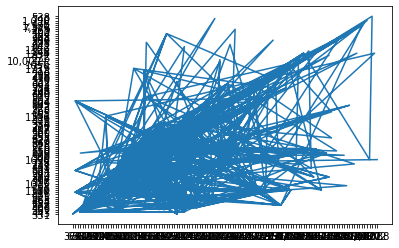

In [101]:
plt.plot(data['Horsepower'],data['Torque (lb-ft)'])